In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
#position=< 21518, -21209> velocity=<-2,  2>
#position=< 10842,  21423> velocity=<-1, -2>
#position=< 32189, -21209> velocity=<-3,  2>
#position=<-21158, -21218> velocity=< 2,  2>
#position=<-31794, -53194> velocity=< 3,  5>
#position=<-42469,  42743> velocity=< 4, -4>
#position=<-53120, -31873> velocity=< 5,  3>

with open('10.txt','r') as f:
    dataset = f.readlines()

data = np.zeros((len(dataset),4),dtype=int)

for index, line in enumerate(dataset):
    data[index] = np.array([int(x) for x in re.compile('[0-9\-]+').findall(line)]) # Strip to nums
print(data[:5])

[[ 21518 -21209     -2      2]
 [ 10842  21423     -1     -2]
 [ 32189 -21209     -3      2]
 [-21158 -21218      2      2]
 [-31794 -53194      3      5]]


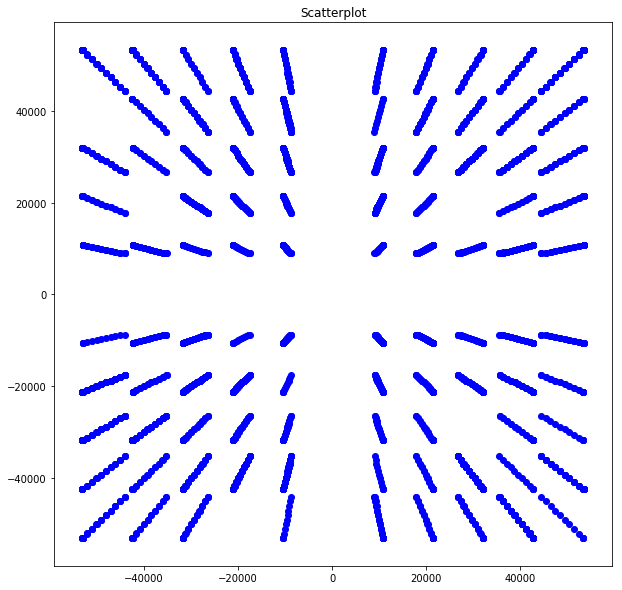

In [5]:
# Simulate the animation
animdata = data

def animate(frame):
    animdata = np.zeros((data.shape[0], 2))
    for index, line in enumerate(data):
        # line[0:2] += line[2:4] * frame * 100000
        animdata[index] = line[0:2] + line[2:4] * frame * 200
    ax.scatter(x=animdata[:,0], y=animdata[:,1], color='b')

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

plt.title('Scatterplot')
scatterplot = ax.scatter(x=data[:,0],y=data[:,1],color='b')

WriterObj = animation.writers['ffmpeg']
writer = WriterObj(fps=10,metadata=dict(artist='Syris Norelli'), bitrate=2000)

movie = animation.FuncAnimation(fig, animate, frames=10, repeat=True)
movie.save('simulation.mp4', writer=writer)

In [ ]:
help(scatterplot)